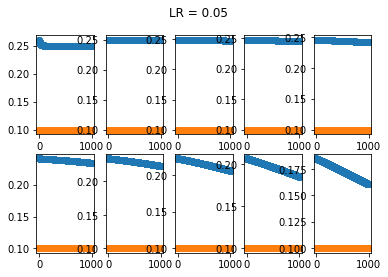

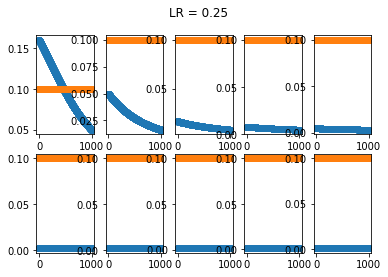

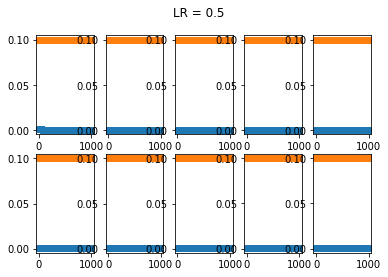

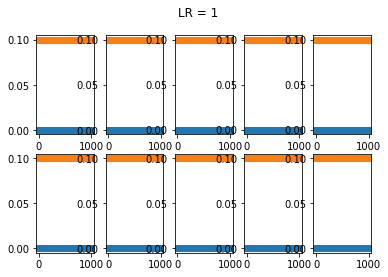

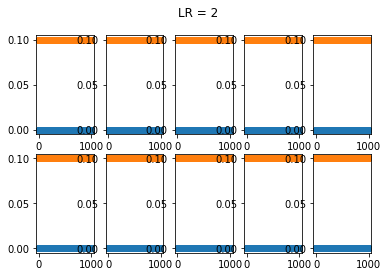

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras import activations
from keras import optimizers

EPOCHS = 1000

HL_NEURONS = 8
LR = [0.05, 0.25, 0.5, 1, 2]

ACTIVATION = activations.sigmoid
MOMENTUUM = 0
SHUFFLE = True

LOSS_TARGET = 0.1

# the four different states of the XOR gate
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# the four expected results in the same order
target_data = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(HL_NEURONS, input_dim=2, activation=ACTIVATION))
model.add(Dense(1, activation=ACTIVATION))

for k in range(len(LR)):
    fig, plots = plt.subplots(2, 5)
    fig.suptitle('LR = ' + str(LR[k]))
    for i in range(2):
        for j in range(5):
            model.compile(loss='mean_squared_error',
                          optimizer=optimizers.gradient_descent_v2.SGD(
                              learning_rate=LR[k],
                              momentum=MOMENTUUM),
                          metrics=None)

            history = model.fit(training_data,
                                target_data,
                                shuffle=SHUFFLE,
                                epochs=EPOCHS,
                                verbose=None)

            # print(model.predict(training_data).round())

            plots[i, j].plot(history.history['loss'], 'o')
            plots[i, j].plot([LOSS_TARGET for i in range(EPOCHS)], 'o')
            # plt.savefig('last.png')

    plt.show()
